In [11]:
import collections
from time import sleep
from datetime import datetime
import pandas as pd
from vnpy.app.cta_strategy.backtesting import BacktestingEngine
from boll_channel_strategy_fixed_stop_loss import MyBollChannelStrategy
from boll_channel_strategy_fixed_stop_loss import MyFixedStopLossBollChannelStrategy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="MGC.NYMEX",
    interval="1m",
    start=datetime(2007, 12, 12),
    end=datetime(2020, 5, 1),
    rate=0.000028,
    slippage=0.1,
    size=10,
    pricetick=0.1,
    capital=20000,
    collection_name = "MGC"
)
engine.load_data()

2020-06-07 16:58:45.807052	开始加载历史数据
2020-06-07 16:58:45.815046	加载进度： [1%]
2020-06-07 16:58:45.819046	加载进度： [1%]
2020-06-07 16:58:45.822044	加载进度： [2%]
2020-06-07 16:58:45.825044	加载进度： [3%]
2020-06-07 16:58:45.828042	加载进度： [3%]
2020-06-07 16:58:45.832040	加载进度： [4%]
2020-06-07 16:58:45.834039	加载进度： [5%]
2020-06-07 16:58:45.837042	加载进度： [5%]
2020-06-07 16:58:45.839036	加载进度： [6%]
2020-06-07 16:58:45.842036	加载进度： [7%]
2020-06-07 16:58:45.844036	加载进度： [7%]
2020-06-07 16:58:45.847034	加载进度： [8%]
2020-06-07 16:58:45.849032	加载进度： [9%]
2020-06-07 16:58:45.852032	加载进度： [9%]
2020-06-07 16:58:45.855030	加载进度： [10%]
2020-06-07 16:58:45.857027	加载进度：# [11%]
2020-06-07 16:58:45.859027	加载进度：# [11%]
2020-06-07 16:58:45.862027	加载进度：# [12%]
2020-06-07 16:58:45.864026	加载进度：# [13%]
2020-06-07 16:58:45.867025	加载进度：# [13%]
2020-06-07 16:58:45.869024	加载进度：# [14%]
2020-06-07 16:58:45.872021	加载进度：# [15%]
2020-06-07 16:58:45.874020	加载进度：# [15%]
2020-06-07 16:58:45.877020	加载进度：# [16%]
2020-06-07 16:58:45.879019	加载进度：#

In [12]:
class_dict = collections.defaultdict(list)
for class_instance in engine.history_data:
    for key, value in class_instance.__dict__.items():
        class_dict[key].append(value)
frame = pd.DataFrame.from_dict(class_dict)

In [13]:
frame.head(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
0,DB,MGC,Exchange.NYMEX,2011-03-25 00:12:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
1,DB,MGC,Exchange.NYMEX,2011-03-25 01:29:00,Interval.MINUTE,2.0,0.0,1434.7,1434.7,1434.7,1434.7,MGC.NYMEX
2,DB,MGC,Exchange.NYMEX,2011-03-25 01:33:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
3,DB,MGC,Exchange.NYMEX,2011-03-25 02:28:00,Interval.MINUTE,1.0,0.0,1436.5,1436.5,1436.5,1436.5,MGC.NYMEX
4,DB,MGC,Exchange.NYMEX,2011-03-25 03:02:00,Interval.MINUTE,1.0,0.0,1436.2,1436.2,1436.2,1436.2,MGC.NYMEX


In [14]:
frame.tail(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
1189589,DB,MGC,Exchange.NYMEX,2020-01-31 12:33:00,Interval.MINUTE,2.0,0.0,1456.6586,1456.6586,1455.7385,1455.7385,MGC.NYMEX
1189590,DB,MGC,Exchange.NYMEX,2020-01-31 12:36:00,Interval.MINUTE,2.0,0.0,1457.7627,1457.7627,1457.7627,1457.7627,MGC.NYMEX
1189591,DB,MGC,Exchange.NYMEX,2020-01-31 15:22:00,Interval.MINUTE,5.0,0.0,1459.8789,1459.8789,1459.8789,1459.8789,MGC.NYMEX
1189592,DB,MGC,Exchange.NYMEX,2020-01-31 15:24:00,Interval.MINUTE,5.0,0.0,1460.2469,1460.2469,1460.2469,1460.2469,MGC.NYMEX
1189593,DB,MGC,Exchange.NYMEX,2020-01-31 15:59:00,Interval.MINUTE,1.0,0.0,1459.0508,1459.0508,1459.0508,1459.0508,MGC.NYMEX


2020-06-07 17:11:20.969363	策略初始化完成
2020-06-07 17:11:20.970363	开始回放历史数据
2020-06-07 17:11:38.545844	历史数据回放结束
2020-06-07 17:11:38.546844	开始计算逐日盯市盈亏
2020-06-07 17:11:38.587825	逐日盯市盈亏计算完成
2020-06-07 17:11:38.588826	开始计算策略统计指标
2020-06-07 17:11:38.603817	------------------------------
2020-06-07 17:11:38.604816	首个交易日：	2011-04-06
2020-06-07 17:11:38.604816	最后交易日：	2020-01-31
2020-06-07 17:11:38.605818	总交易日：	2744
2020-06-07 17:11:38.605818	盈利交易日：	894
2020-06-07 17:11:38.605818	亏损交易日：	1238
2020-06-07 17:11:38.606815	起始资金：	20,000.00
2020-06-07 17:11:38.606815	结束资金：	19,400.86
2020-06-07 17:11:38.606815	总收益率：	-3.00%
2020-06-07 17:11:38.607815	年化收益：	-0.26%
2020-06-07 17:11:38.607815	最大回撤: 	-2,918.58
2020-06-07 17:11:38.607815	百分比最大回撤: -13.08%
2020-06-07 17:11:38.607815	最长回撤天数: 	2343
2020-06-07 17:11:38.608816	总盈亏：	-599.14
2020-06-07 17:11:38.608816	总手续费：	1,667.94
2020-06-07 17:11:38.608816	总滑点：	4,569.00
2020-06-07 17:11:38.609816	总成交金额：	59,569,326.81
2020-06-07 17:11:38.609816	总成交笔数：	4569
2020-06-07 

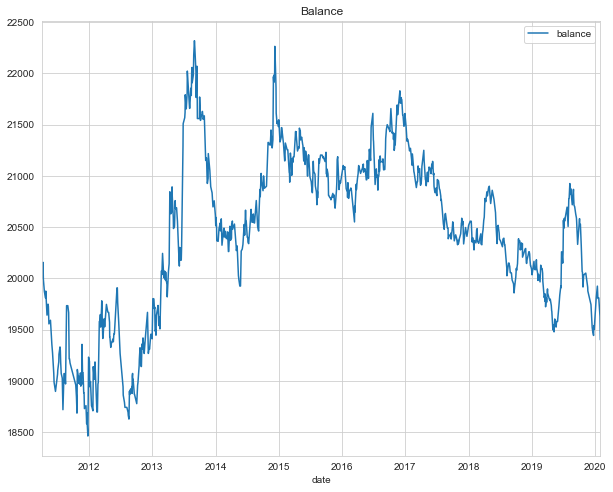

In [16]:
engine.clear_data()
engine.add_strategy(MyBollChannelStrategy, {})
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
#engine.show_chart()
df = engine.daily_df.sample(n=900, random_state=1)
plt.figure(figsize=(10, 8))
balance_plot = plt.subplot(1, 1, 1)
balance_plot.set_title("Balance")
df["balance"].plot(legend=True)

Fixed stop loss tests

2020-06-07 17:13:32.661438	策略初始化完成
2020-06-07 17:13:32.662439	开始回放历史数据
2020-06-07 17:13:48.968542	历史数据回放结束
2020-06-07 17:13:48.968542	开始计算逐日盯市盈亏
2020-06-07 17:13:49.005524	逐日盯市盈亏计算完成
2020-06-07 17:13:49.006524	开始计算策略统计指标
2020-06-07 17:13:49.016518	------------------------------
2020-06-07 17:13:49.016518	首个交易日：	2011-04-06
2020-06-07 17:13:49.017519	最后交易日：	2020-01-31
2020-06-07 17:13:49.017519	总交易日：	2744
2020-06-07 17:13:49.017519	盈利交易日：	896
2020-06-07 17:13:49.017519	亏损交易日：	1237
2020-06-07 17:13:49.018519	起始资金：	20,000.00
2020-06-07 17:13:49.018519	结束资金：	17,204.54
2020-06-07 17:13:49.018519	总收益率：	-13.98%
2020-06-07 17:13:49.018519	年化收益：	-1.22%
2020-06-07 17:13:49.019519	最大回撤: 	-3,559.00
2020-06-07 17:13:49.019519	百分比最大回撤: -17.66%
2020-06-07 17:13:49.019519	最长回撤天数: 	242
2020-06-07 17:13:49.019519	总盈亏：	-2,795.46
2020-06-07 17:13:49.020518	总手续费：	1,683.53
2020-06-07 17:13:49.020518	总滑点：	4,605.00
2020-06-07 17:13:49.020518	总成交金额：	60,126,222.18
2020-06-07 17:13:49.020518	总成交笔数：	4605
2020-06-0

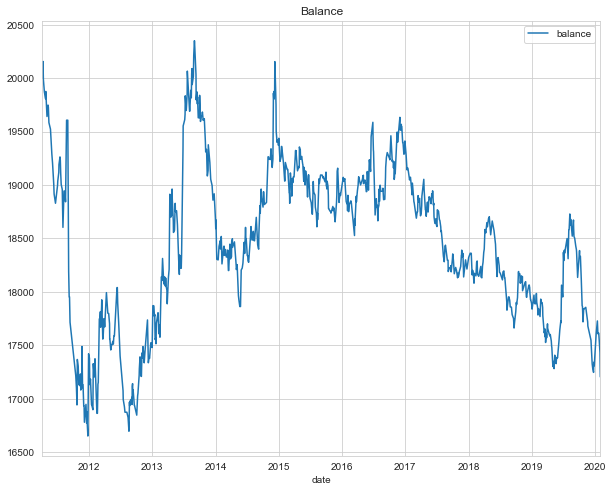

In [18]:
engine.clear_data()
engine.add_strategy(MyFixedStopLossBollChannelStrategy, {})
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
#engine.show_chart()
df = engine.daily_df.sample(n=900, random_state=1)
plt.figure(figsize=(10, 8))
balance_plot = plt.subplot(1, 1, 1)
balance_plot.set_title("Balance")
df["balance"].plot(legend=True)